In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import datetime

# Load the dataset from the provided file path
file_path = "C:\\Users\\sneh_\\Downloads\\cleaned_data\\cleaned_data.csv"
data = pd.read_csv(file_path)

# Display basic information about the dataset to understand its structure
data.info()

# Display the first few rows of the dataset
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   target        1600000 non-null  int64 
 1   id            1600000 non-null  int64 
 2   date          1600000 non-null  object
 3   flag          1600000 non-null  object
 4   user          1600000 non-null  object
 5   text          1600000 non-null  object
 6   cleaned_text  1592484 non-null  object
dtypes: int64(2), object(5)
memory usage: 85.4+ MB


,target,id,date,flag,user,text,cleaned_text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww thats bummer shoulda got david carr third...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,dived many times ball managed save rest go bounds
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole body feels itchy like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",behaving im mad cant see


In [5]:
# 3. Date Analysis
# Converting the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'], errors='coerce').dt.tz_localize(None)


data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['hour'] = data['date'].dt.hour


C:\Users\sneh_\AppData\Local\Temp\ipykernel_19576\2265878129.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hour', data=data, palette='coolwarm')  # or use other colormap like 'viridis'


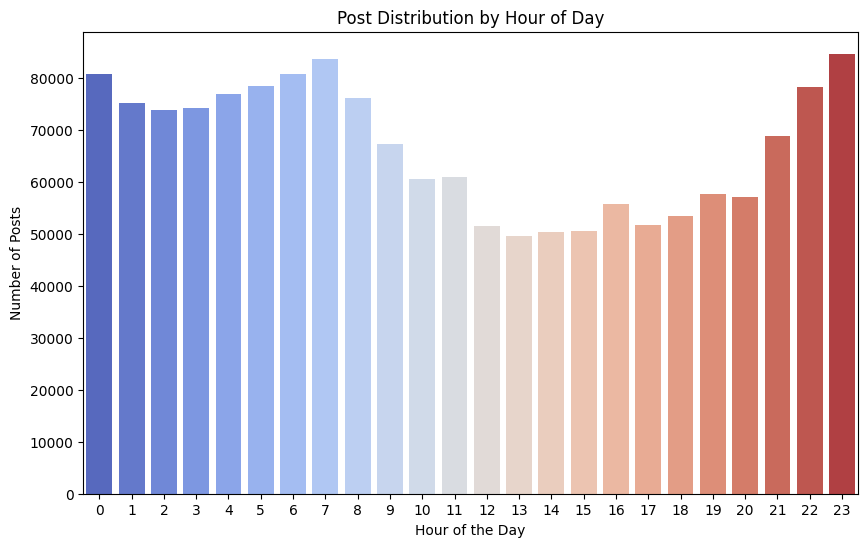

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hourly Distribution with color gradient
plt.figure(figsize=(10, 6))
sns.countplot(x='hour', data=data, palette='coolwarm')  # or use other colormap like 'viridis'
plt.title('Post Distribution by Hour of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Posts')
plt.show()


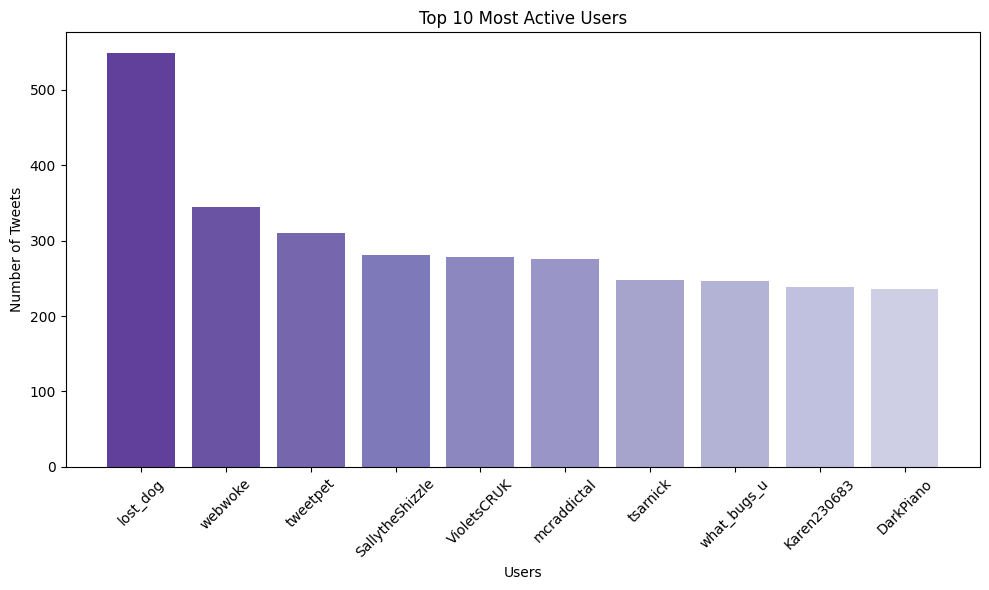

In [36]:
# Top 10 most active users
top_users = data['user'].value_counts().head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_users.index, top_users.values, color=plt.cm.Purples(np.linspace(0.8, 0.3, len(top_users))))
plt.xticks(rotation=45)
plt.title('Top 10 Most Active Users')
plt.xlabel('Users')
plt.ylabel('Number of Tweets')
plt.tight_layout()
plt.show()


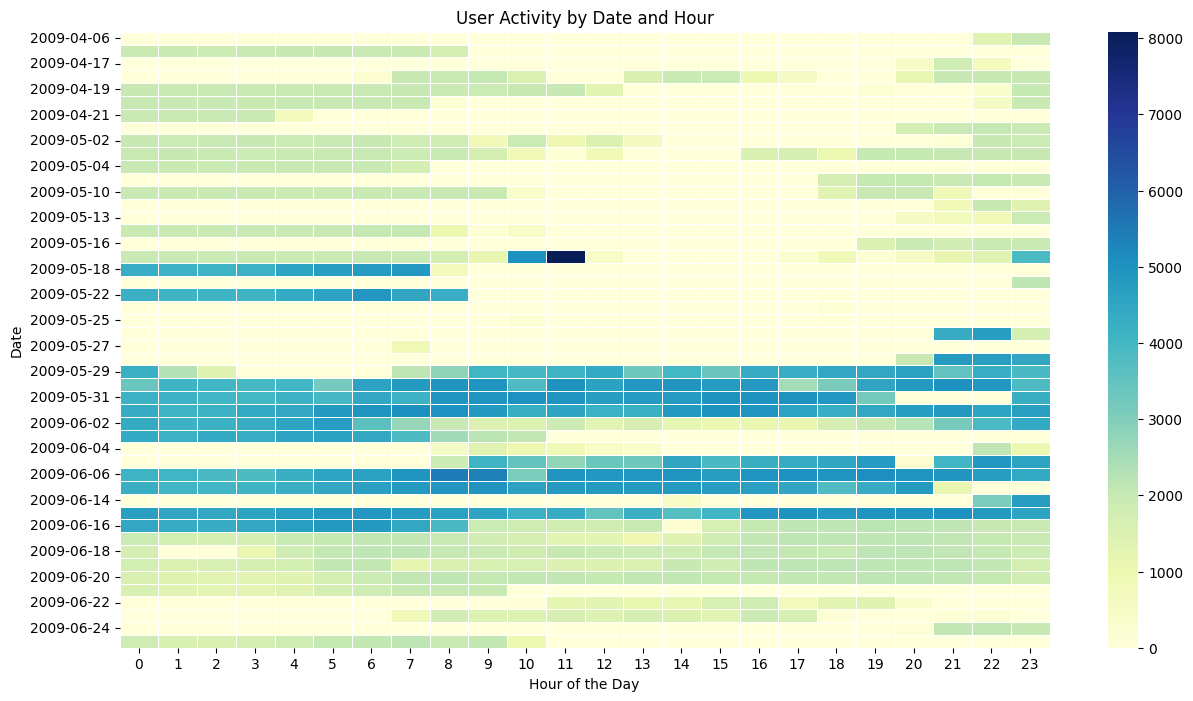

In [49]:
# Step 1: Ensure the 'date' column is in datetime format
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Step 2: Extract the date and hour from the 'date' column
data['date_only'] = data['date'].dt.date
data['hour'] = data['date'].dt.hour

# Step 3: Group by date and hour to count the number of posts
activity_by_date_hour = data.groupby(['date_only', 'hour']).size().unstack(fill_value=0)

# Step 4: Plot the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(activity_by_date_hour, cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title("User Activity by Date and Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Date")
plt.show()

In [18]:
# 2. Most Positive and Most Negative Tweets
# Assuming target: 0 = Negative, 1 = Positive
print("\nMost Positive Tweets:\n", data[data['target'] == 1]['cleaned_text'].head(5))
print("\nMost Negative Tweets:\n", data[data['target'] == 0]['cleaned_text'].head(5))


Most Positive Tweets:
 800000                                   love u guys r best
800001    im meeting one besties tonight cant wait girl ...
800002    thanks twitter add sunisa got meet hin show dc...
800003    sick really cheap hurts much eat real food plu...
800004                                      effect everyone
Name: cleaned_text, dtype: object

Most Negative Tweets:
 0    awww thats bummer shoulda got david carr third...
1    upset cant update facebook texting might cry r...
2    dived many times ball managed save rest go bounds
3                     whole body feels itchy like fire
4                             behaving im mad cant see
Name: cleaned_text, dtype: object


C:\Users\sneh_\AppData\Local\Temp\ipykernel_19576\1767616624.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tweet_counts.index, y=tweet_counts.values, palette='coolwarm')  # Change 'coolwarm' to other colormaps if needed


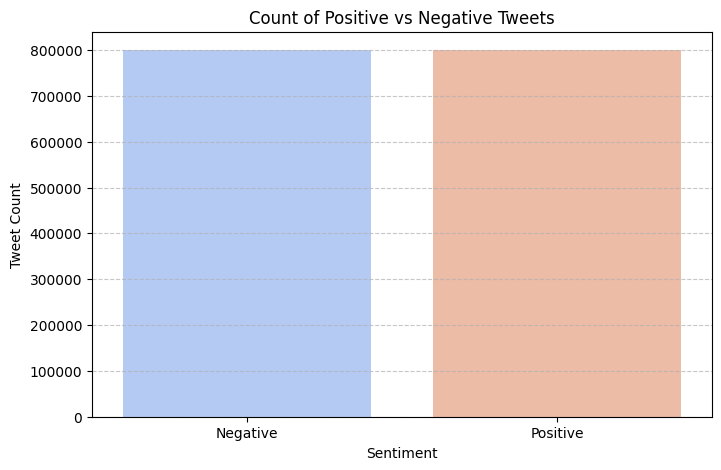

In [38]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Counting the number of positive and negative tweets
tweet_counts = data['target'].value_counts()

# Creating a bar plot with color gradient
plt.figure(figsize=(8, 5))
sns.barplot(x=tweet_counts.index, y=tweet_counts.values, palette='coolwarm')  # Change 'coolwarm' to other colormaps if needed
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.title('Count of Positive vs Negative Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



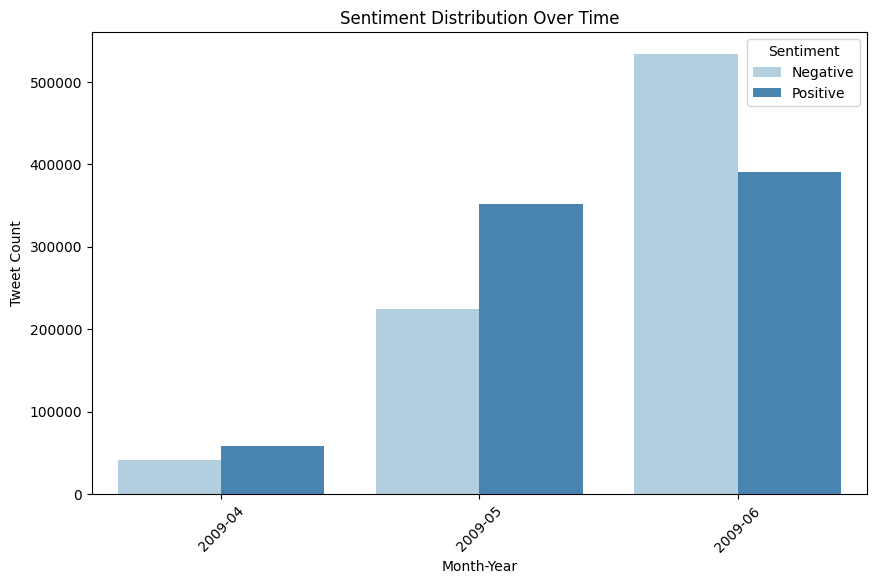

In [42]:
#Sentiment Distribution Over Time 
plt.figure(figsize=(10, 6))
data['month_year'] = data['date'].dt.to_period('M')
sns.countplot(x='month_year', hue='target', data=data, palette='')  # Change 'Blues' to any other palette
plt.xticks(rotation=45)
plt.title('Sentiment Distribution Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Tweet Count')
plt.legend(title='Sentiment', labels=['Negative', 'Positive'])
plt.show()
